# 📘 Section 1: Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
sns.set(style="whitegrid")
%matplotlib inline



# 📘 Section 2: Load the California Housing Dataset

In [4]:
from sklearn.datasets import fetch_california_housing

# Load dataset
housing = fetch_california_housing(as_frame=True)

# Features and target
df = housing.frame
df.head()


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

# 📘 Section 3: Dataset Shape And Column Info

In [5]:

print("Shape of dataset:", df.shape)

print("\nDataset Info:")
print(df.info())


Shape of dataset: (20640, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


# 📘 Section 4: Missing Values Check

In [6]:

print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


# 📘 Section 5: Summary Statistics (EDA part-1)

In [7]:

df.describe()


MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

# 📘 Section 6: Data Visualization (EDA part-2)

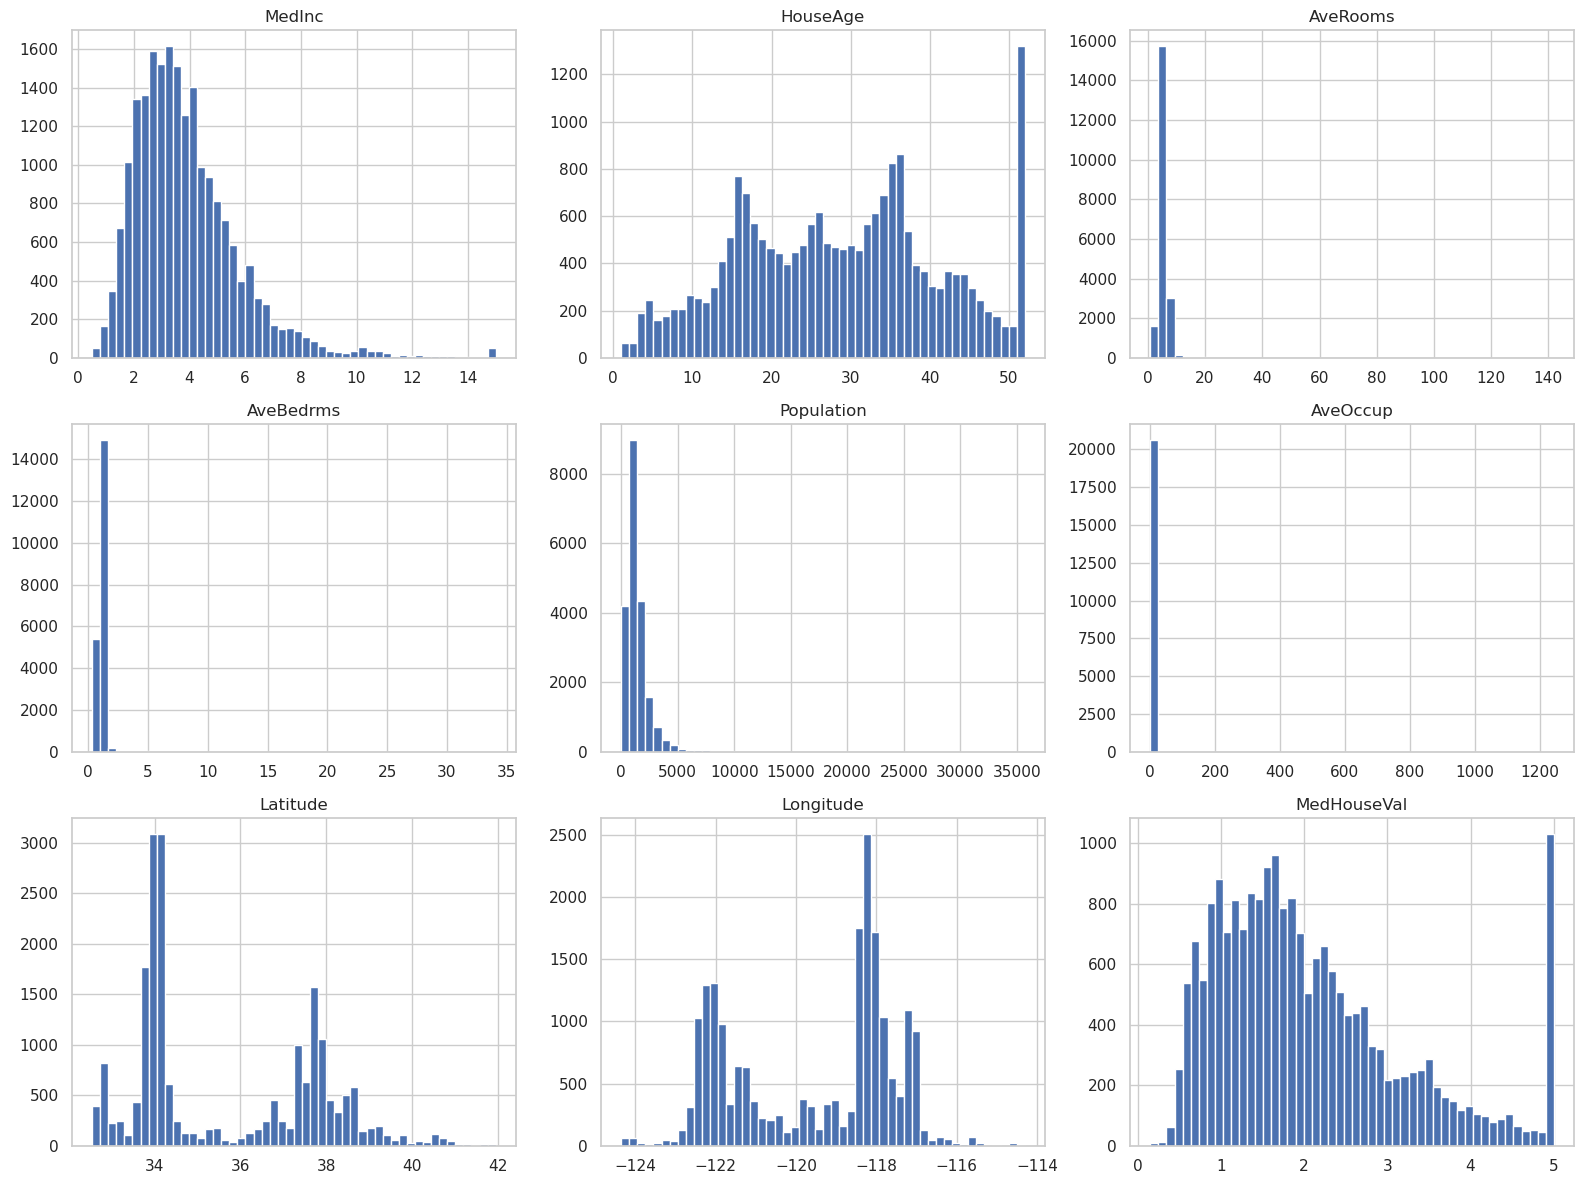

In [8]:
# Histogram: every column  distribution
df.hist(figsize=(16, 12), bins=50)
plt.tight_layout()
plt.show()


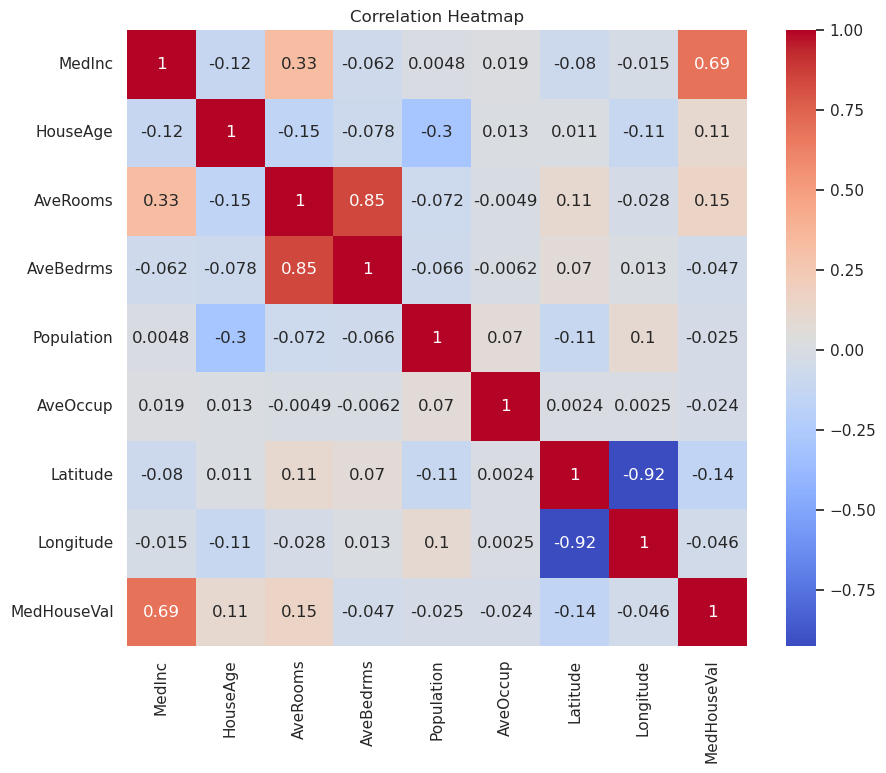

In [9]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# 📘 Section 7: Clean Data (if needed)
##  Here no missing value, so we are not using anything

## 📘 Part 2: Gradient Descent with Different Learning Rates

# 🔹 Step 1: Train/Test Split

In [10]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 🔹 Step 2: Feature Scaling (Standardization)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Only fit on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 🔹 Step 3: Custom Gradient Descent Function

In [12]:
def gradient_descent(X, y, lr=0.01, n_iters=100):
    m = X.shape[0]
    n = X.shape[1]
    
    # Initialize weights and bias
    weights = np.zeros(n)
    bias = 0
    losses = []

    for i in range(n_iters):
        # Prediction
        y_pred = np.dot(X, weights) + bias
        
        # Loss (MSE)
        loss = np.mean((y - y_pred)**2)
        losses.append(loss)

        # Gradients
        dw = -(2/m) * np.dot(X.T, (y - y_pred))
        db = -(2/m) * np.sum(y - y_pred)

        # Update
        weights -= lr * dw
        bias -= lr * db
    
    return weights, bias, losses


# 🔹 Step 4: Train with Different Learning Rates

In [13]:
learning_rates = [0.001, 0.01, 0.1]
n_iters = 100
results = {}

for lr in learning_rates:
    w, b, loss = gradient_descent(X_train_scaled, y_train.values, lr=lr, n_iters=n_iters)
    results[lr] = loss


# 🔹 Step 5: Plot Loss vs Iterations

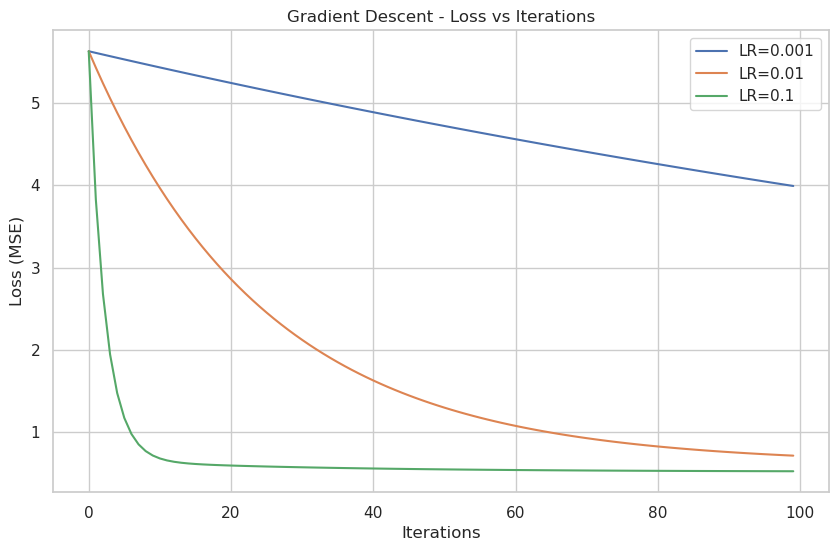

In [14]:
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(range(n_iters), results[lr], label=f"LR={lr}")

plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Gradient Descent - Loss vs Iterations")
plt.legend()
plt.grid(True)
plt.show()


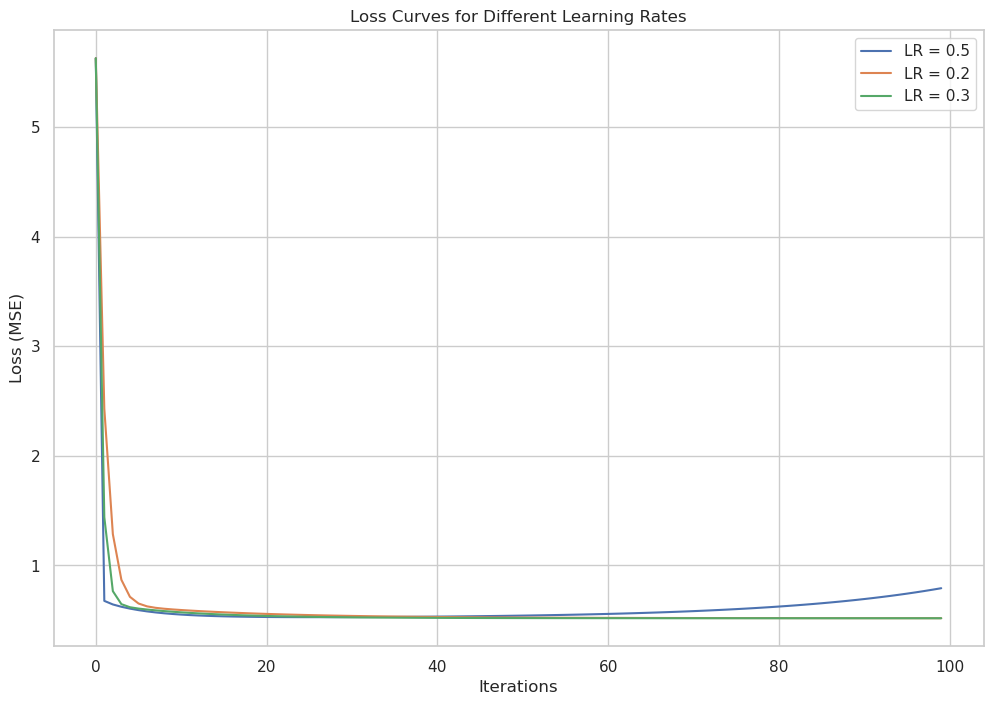

In [18]:
learning_rates = [0.5, 0.2, 0.3]
plt.figure(figsize=(12, 8))

for lr in learning_rates:
    w, b, loss = gradient_descent(X_train_scaled, y_train.values, lr=lr, n_iters=100)
    plt.plot(range(100), loss, label=f"LR = {lr}")

plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Loss Curves for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()

#  Accuracy or performance

## 🔹 Predict on test data:

In [19]:
# Predict using manual Gradient Descent
y_pred = X_test_scaled @ w + b


## 🔹 Evaluate using RMSE:

In [20]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE (Manual Gradient Descent): {rmse:.4f}")


RMSE (Manual Gradient Descent): 0.7458


# Compare with sklearn's LinearRegression:

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred_sklearn = model.predict(X_test_scaled)

rmse_sklearn = np.sqrt(mean_squared_error(y_test, y_pred_sklearn))
print(f"RMSE (Sklearn Linear Regression): {rmse_sklearn:.4f}")


RMSE (Sklearn Linear Regression): 0.7456


# Performance improve 

In [22]:
print(y.min(), y.max())


0.14999 5.00001


## 🔹 (1) Feature Engineering

In [23]:
df['Income_rooms'] = df['MedInc'] * df['AveRooms']


## 🔹 (2) Outlier Handling

In [24]:
sns.boxplot(df["MedHouseVal"])


<Axes: ylabel='MedHouseVal'>

## 🔹 (3) Polynomial Features

In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train_scaled)


## 🔹 (4) Other Model try (Random Forest, XGBoost)

In [26]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


RMSE: 0.5040181384301426


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [38]:
# Load California Housing dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X, y = pd.DataFrame(data.data, columns=data.feature_names), data.target

# Add new features for feature engineering
X['RoomsPerHousehold'] = X['AveRooms'] / X['HouseAge']
X['BedroomsPerRoom'] = X['AveBedrms'] / X['AveRooms']
X['PopulationPerHousehold'] = X['Population'] / X['HouseAge']

# Remove outliers (only top 1% high-valued targets removed for simplicity)
q_hi = y < np.quantile(y, 0.99)
X, y = X[q_hi], y[q_hi]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "PolynomialRegression(deg=2)": Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('scaler', StandardScaler()),
        ('linreg', LinearRegression())
    ]),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train & evaluate models
results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ]) if 'Polynomial' not in name else model  # Polynomial pipeline has scaler inside

    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)
    # Fix: Calculate RMSE manually instead of using squared=False
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    results[name] = rmse

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['RMSE']).sort_values(by='RMSE')
print("Model RMSE Comparison:")
print("=" * 30)
print(results_df)

Model RMSE Comparison:
                                 RMSE
RandomForest                 0.476655
GradientBoosting             0.504378
PolynomialRegression(deg=2)  0.579883
LinearRegression             0.644269
Ridge                        0.644272
Lasso                        0.749030


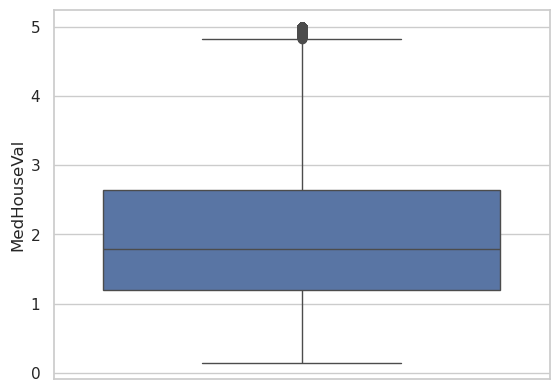

<Figure size 1200x600 with 0 Axes>

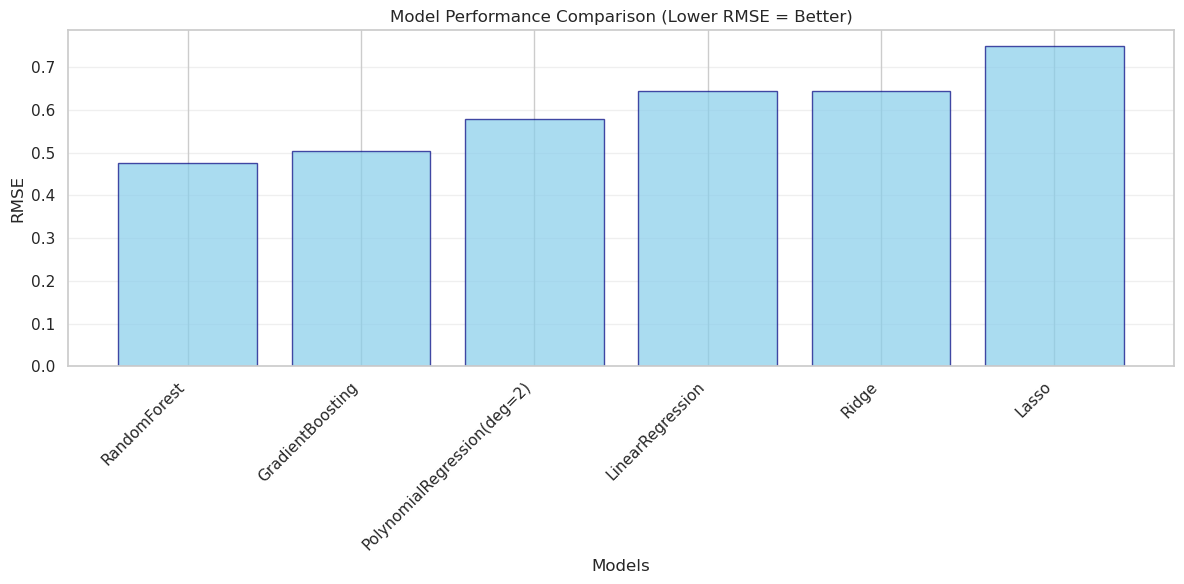


🏆 Best Model: RandomForest
🔹 RMSE: 0.4767
🔹 Improvement over Linear Regression: 26.02%


In [39]:
# Visualize model performance
plt.figure(figsize=(12, 6))
plt.bar(results_df.index, results_df['RMSE'], color='skyblue', edgecolor='navy', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Model Performance Comparison (Lower RMSE = Better)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print best performing model
best_model = results_df.index[0]
best_rmse = results_df.iloc[0]['RMSE']
print(f"\n🏆 Best Model: {best_model}")
print(f"🔹 RMSE: {best_rmse:.4f}")

# Performance improvement percentage compared to Linear Regression
linear_rmse = results['LinearRegression']
improvement = ((linear_rmse - best_rmse) / linear_rmse) * 100
print(f"🔹 Improvement over Linear Regression: {improvement:.2f}%")